Polynomial Regression

Bias and Variance

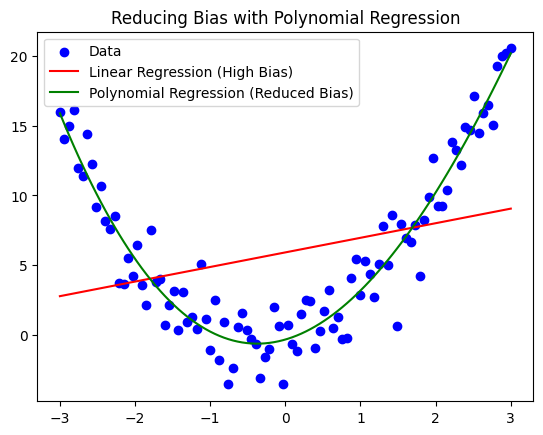

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**2 + X + np.random.randn(100, 1) * 2  # Quadratic relationship with noise

# Fit linear regression (high bias)
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Fit polynomial regression (lower bias)
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X, y)
y_pred_poly = poly_model.predict(X)

# Plot results
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, y_pred_linear, color="red", label="Linear Regression (High Bias)")
plt.plot(X, y_pred_poly, color="green", label="Polynomial Regression (Reduced Bias)")
plt.legend()
plt.title("Reducing Bias with Polynomial Regression")
plt.show()


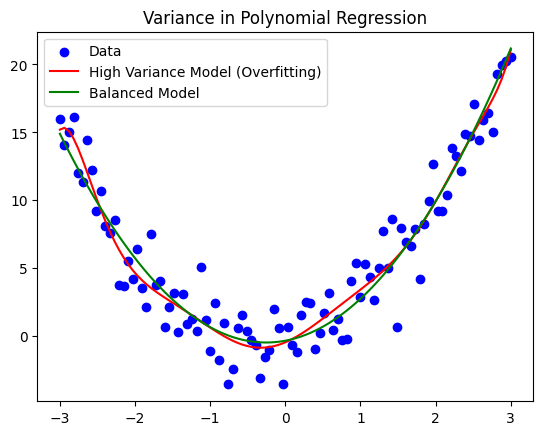

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic data (quadratic relationship)
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**2 + X + np.random.randn(100, 1) * 2  # Quadratic with noise

# Fit high-degree polynomial regression (high variance)
poly_model = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
poly_model.fit(X, y)
y_pred_poly = poly_model.predict(X)

# Fit low-degree polynomial regression (low variance)
simple_poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
simple_poly_model.fit(X, y)
y_pred_simple_poly = simple_poly_model.predict(X)

# Plot results
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, y_pred_poly, color="red", label="High Variance Model (Overfitting)")
plt.plot(X, y_pred_simple_poly, color="green", label="Balanced Model")
plt.legend()
plt.title("Variance in Polynomial Regression")
plt.show()


Polynomial Regression (non linearity)

In [20]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures    
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [21]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

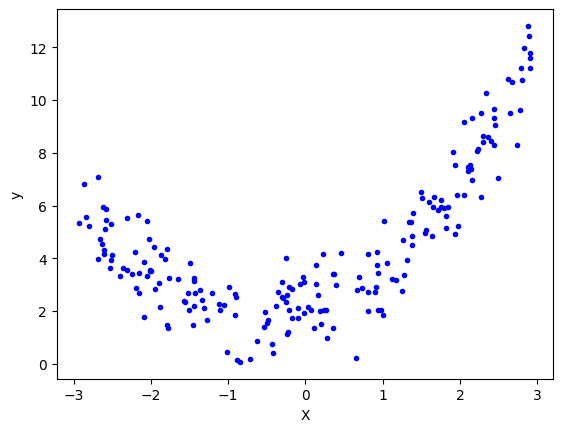

In [22]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [23]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
# Applying linear regression
lr = LinearRegression()

In [27]:

lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.22741840208422526

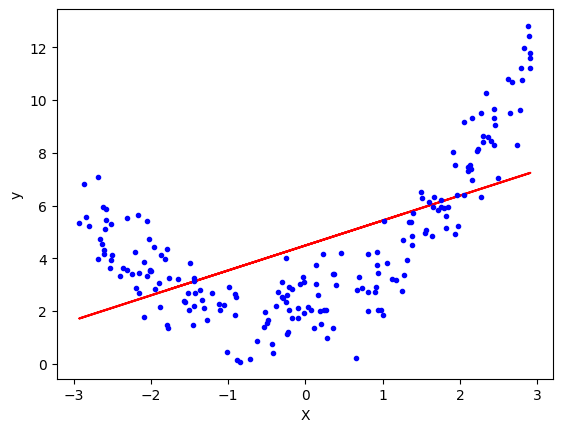

In [29]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [30]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**2 + np.random.normal(0, 1, X.shape)  # Quadratic relationship with noise

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Degree: 1
Train Error: 8.9336, Validation Error: 7.5117



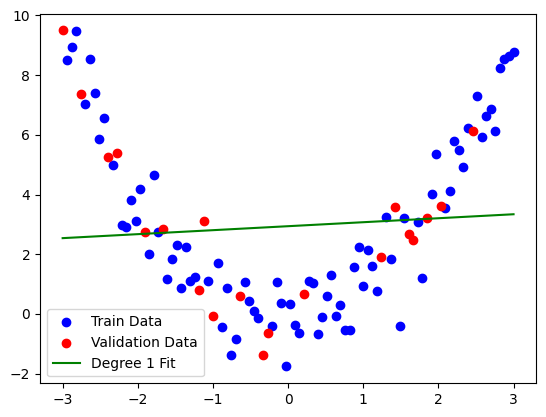

Degree: 10
Train Error: 0.7493, Validation Error: 0.8173



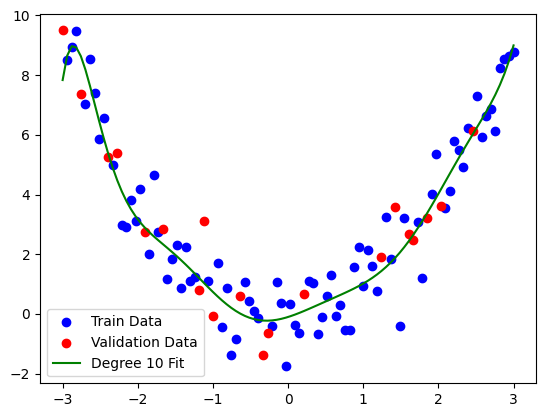

In [4]:
def train_and_evaluate(degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)

    print(f"Degree: {degree}")
    print(f"Train Error: {train_error:.4f}, Validation Error: {val_error:.4f}\n")

    # Plot results
    plt.scatter(X_train, y_train, label="Train Data", color="blue")
    plt.scatter(X_val, y_val, label="Validation Data", color="red")
    X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    plt.plot(X_range, model.predict(X_range_poly), label=f"Degree {degree} Fit", color="green")
    plt.legend()
    plt.show()

# Low Complexity Model (High Bias)
train_and_evaluate(degree=1)

# High Complexity Model (High Variance)
train_and_evaluate(degree=10)


Degree: 1 | Train Error: 8.9336 | Validation Error: 7.5117
Degree: 2 | Train Error: 0.8603 | Validation Error: 0.6196
Degree: 3 | Train Error: 0.8160 | Validation Error: 0.6022
Degree: 4 | Train Error: 0.7990 | Validation Error: 0.6349
Degree: 5 | Train Error: 0.7972 | Validation Error: 0.6491
Degree: 6 | Train Error: 0.7970 | Validation Error: 0.6523
Degree: 7 | Train Error: 0.7957 | Validation Error: 0.6539
Degree: 8 | Train Error: 0.7889 | Validation Error: 0.6220
Degree: 9 | Train Error: 0.7522 | Validation Error: 0.7413
Degree: 10 | Train Error: 0.7493 | Validation Error: 0.8173


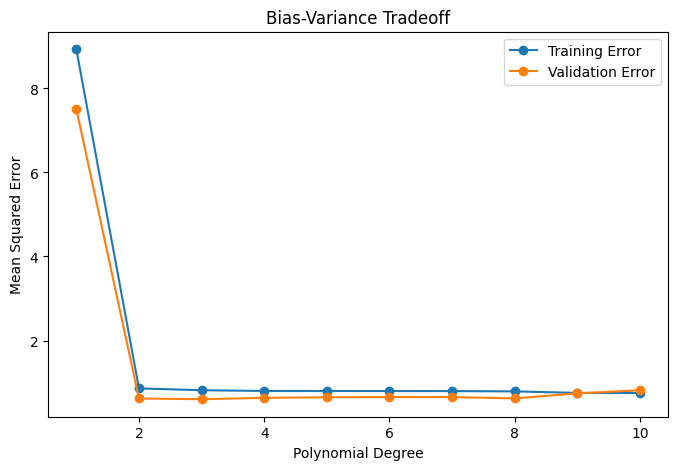

In [5]:
degrees = range(1, 11)  # Trying polynomial degrees from 1 to 10
train_errors = []
val_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)

    train_errors.append(train_error)
    val_errors.append(val_error)

    print(f"Degree: {degree} | Train Error: {train_error:.4f} | Validation Error: {val_error:.4f}")

# Plot training and validation errors
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Training Error", marker="o")
plt.plot(degrees, val_errors, label="Validation Error", marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.show()


Standard Scale Fit(), Transform() and fit_transform()

Standard Scale Fit(), Transform() and fit_transform()

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# House size (sq ft) and number of bedrooms
X = np.array([[1200, 3], [1500, 4], [1800, 3], [2500, 5], [3000, 6]])

# Initialize the scaler
scaler = StandardScaler()

# 1️⃣ Using fit() -> Learns mean and standard deviation (but doesn't transform data)
scaler.fit(X)
print("Mean:", scaler.mean_)  # Mean of each feature
print("Scale:", scaler.scale_)  # Standard deviation of each feature

# 2️⃣ Using transform() -> Uses learned mean & std to transform data
X_scaled = scaler.transform(X)
print("\nTransformed Data:\n", X_scaled)

# 3️⃣ Using fit_transform() -> Does fit + transform in one step
X_scaled_direct = StandardScaler().fit_transform(X)
print("\nFit-Transformed Data:\n", X_scaled_direct)


Mean: [2000.     4.2]
Scale: [660.30296077   1.16619038]

Transformed Data:
 [[-1.21156507 -1.02899151]
 [-0.75722817 -0.17149859]
 [-0.30289127 -1.02899151]
 [ 0.75722817  0.68599434]
 [ 1.51445633  1.54348727]]

Fit-Transformed Data:
 [[-1.21156507 -1.02899151]
 [-0.75722817 -0.17149859]
 [-0.30289127 -1.02899151]
 [ 0.75722817  0.68599434]
 [ 1.51445633  1.54348727]]


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, 
                           weights=[0.9, 0.1], # 90% class 0, 10% class 1
                           n_samples=1000, n_features=2, 
                           random_state=42)

# Step 2: Visualize class imbalance
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title("Before SMOTE (Imbalanced Data)")
plt.show()

# Step 3: Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Visualize balanced dataset
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='coolwarm', alpha=0.5)
plt.title("After SMOTE (Balanced Data)")
plt.show()

# Step 5: Check class distribution
print("Before SMOTE:", np.bincount(y))  # Class distribution before SMOTE
print("After SMOTE:", np.bincount(y_resampled))  # Class distribution after SMOTE


ModuleNotFoundError: No module named 'sklearn.over_sampling'